# 图像特效-暗角滤镜

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [16]:
src = cv2.imread('../datas/f2.jpg')
gray = cv2.imread('../datas/f2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [6]:
def dark_corner(src,dark_radius=3,last_level=30):
    height,width = src.shape[0],src.shape[1]
    srcf = np.float32(src)
    dst = srcf.copy()
    #暗角级别 分1-10级
    R = dark_radius
    xLength = R * 2 + 1
    #暗角最终的级别 0 - 255
    lastLevel = last_level
    # 计算中心点
    middleX = width * 2 // 3
    middleY = height * 1// 2
    
    #计算距中心点最长距离
    maxDistance =  math.sqrt(middleX ** 2 + middleY**2)
    # 开始产生暗角的距离
    startDistance = int(maxDistance * (1 - R / 10))
    def cal_distance(p1,p2):
        return math.sqrt(p1 ** 2 + p2 ** 2)
    # 基于三次贝塞尔曲线 
    def cube_bezer_curve(x, p0, p1, p2, p3):
        return p0 * math.pow((1 - x), 3) + 3 * p1 * x * math.pow((1 - x), 2) + 3 * p2 * x * x * (1 - x) + p3 * math.pow(x, 3)
    #计算当前点应增加的暗度
    def cal_dark(x, y, p):
        distance = math.sqrt((x - middleX) ** 2 + (y - middleY) ** 2)
        currBilv = (distance - startDistance) / (maxDistance - startDistance)
        if(currBilv < 0):
            currBilv = 0
        # 应该增加暗度
        return  cube_bezer_curve(currBilv, 0, 0.02, 0.3, 1) * p * lastLevel / 255
    for i in range(height):
        for j in range(width):
            dDarkness = cal_dark(j,i,src[i,j])
            dst[i,j] -= dDarkness
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

In [17]:
dst = dark_corner(rgb,dark_radius=5,last_level=60)

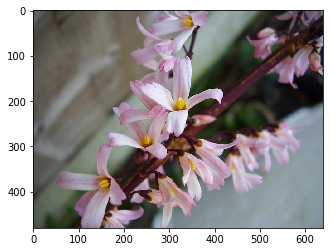

In [18]:
plt.imshow(dst)

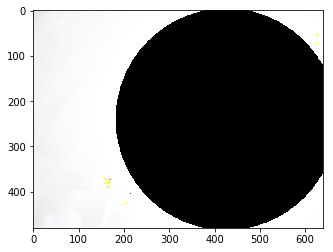

In [19]:
plt.imshow(np.abs(dst - rgb))